In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr
import datetime

In [2]:
def create_df(data,target_variable):
    df = data.reset_index().rename(columns={'index':'ds',target_variable:'y'})
    return df 

In [3]:
def train_test_split(data,lockdown=True):
    if lockdown:
        train_start , train_end = '2017-01-01' , '2020-03-23'
        test_start, test_end = '2020-03-23' , '2020-04-23'
        
        train = data[(data.ds >= train_start ) & (data.ds < train_end ) ]
        test = data[(data.ds >= test_start ) & (data.ds <= test_end ) ]
    else:
        train_start , train_end = '2017-01-01' , '2020-01-23'
        test_start, test_end = '2020-01-23' , '2020-02-23'
        
        train = data[(data.ds >= train_start ) & (data.ds < train_end ) ]
        test = data[(data.ds >= test_start ) & (data.ds <= test_end ) ]
        
    return train, test

In [4]:
def NO2_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan )
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    return model, train, test, forecast

In [5]:
def NO2_Vol_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan )
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet()
    model.add_regressor('Volume')
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    return model, train, test, forecast

In [6]:
def NO2_ws_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan ) 
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet()
    model.add_regressor('ws')
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    
    return model, train, test, forecast

In [7]:
def Met_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan )
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet()
    model.add_regressor('temp')
    model.add_regressor('ws')
    model.add_regressor('wd_1')
    model.add_regressor('wd_2')
    model.add_regressor('wd_3')
    model.add_regressor('wd_4')
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    return model, train, test, forecast

In [8]:
def Met_Vol_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan )
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet()
    model.add_regressor('Volume')
    model.add_regressor('temp')
    model.add_regressor('ws')
    model.add_regressor('wd_1')
    model.add_regressor('wd_2')
    model.add_regressor('wd_3')
    model.add_regressor('wd_4')
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    return model, train, test, forecast

In [9]:
def all_var_model(data, y, LD):
    df = create_df(data , y)
    df[['y']] = np.log(df[['y']])
    df = df.replace([np.inf, -np.inf], np.nan )
    train, test = train_test_split(df,lockdown=LD)
    model = Prophet()
    model.add_regressor('Volume')
    model.add_regressor('temp')
    model.add_regressor('ws')
    model.add_regressor('wd_1')
    model.add_regressor('wd_2')
    model.add_regressor('wd_3')
    model.add_regressor('wd_4')
    model.add_regressor('Mon')
    model.add_regressor('Tue')
    model.add_regressor('Wed')
    model.add_regressor('Thu')
    model.add_regressor('Fri')
    model.add_regressor('Sat')
    model.add_regressor('Sun')
    model.add_regressor('Jan')
    model.add_regressor('Feb')
    model.add_regressor('Mar')
    model.add_regressor('Apr')
    model.add_regressor('May')
    model.add_regressor('June')
    model.add_regressor('July')
    model.add_regressor('Aug')
    model.add_regressor('Sep')
    model.add_regressor('Oct')
    model.add_regressor('Nov')
    model.add_regressor('Dec')
    model.fit(train)
    forecast = model.predict(test)
    forecast[['yhat']] = np.exp(forecast[['yhat']])
    test[['y']] = np.exp(test[['y']])
    return model, train, test, forecast

In [10]:
def evaluate_model(test,forecast):
    measured = test['y']
    predicted = forecast['yhat']
    return np.round(mean_squared_error(measured,predicted,squared=False),3), np.round(mean_absolute_percentage_error(measured,predicted),3), np.round(r2_score(measured,predicted),3)

In [39]:
def plot_FPM(forecast,test,colour,variables):
    plt.plot(forecast['ds'],test['y'],color='r',label='Observed')
    plt.plot(forecast['ds'],forecast['yhat'],color=colour,label=variables)
    plt.xticks(rotation=45,fontsize=25)
    measured = test['y'].fillna(test['y'].mean())
    predicted = forecast['yhat'].fillna(forecast['yhat'].mean())
    RMSE = np.round(mean_squared_error(measured,predicted,squared=False),3)
    MAPE = np.round(mean_absolute_percentage_error(measured,predicted),3)
    corr, pval = np.round ( pearsonr(measured,predicted), 3) 
    #R2 = np.round(r2_score(measured,predicted),3)
    plt.title (f'RMSE:{RMSE}, MAPE:{MAPE}, corr:{corr}(p={pval})',fontsize=25)
    plt.legend(prop={'size': 25})
    plt.yticks(fontsize=25)
    plt.ylabel('NO${_2}$ (${\mu g/m^{3}}$)',fontsize=25)

In [12]:
picadilly = pd.read_csv('./MCC_combined.csv',header=0,index_col=0)
sharston = pd.read_csv('./sharston_combined.csv',header=0,index_col=0)

sharston.index = pd.DatetimeIndex(sharston.index,freq='h')
picadilly.index = pd.DatetimeIndex(picadilly.index,freq='h')

#add NO2 / volume column
picadilly['NO2/Vol'] = picadilly['NO2'] / picadilly['Volume']
sharston['NO2/Vol'] = sharston['NO2'] / sharston['Volume']

picadilly[['NO2','temp','ws','wd','Volume','day','month','hour']] =  picadilly[['NO2','temp','ws','wd','Volume','day','month','hour']].astype('int64')
sharston[['NO2','temp','ws','wd','Volume','day','month','hour']] =  sharston[['NO2','temp','ws','wd','Volume','day','month','hour']].astype('int64')

In [13]:
np.round ( mean_squared_error(picadilly['NO2'],picadilly['Volume']), 3 ) 

19352.043

In [14]:
no2pmodel, no2ptrain, no2ptest, no2pforecast = NO2_model(picadilly,'NO2',False)
no2pmodel_ld, no2ptrain_ld, no2ptest_ld, no2pforecast_ld = NO2_model(picadilly,'NO2',True)
no2smodel, no2strain, no2stest, no2sforecast = NO2_model(sharston,'NO2',False)
no2smodel_ld, no2strain_ld, no2stest_ld, no2sforecast_ld = NO2_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [15]:
no2volpmodel, no2volptrain, no2volptest, no2volpforecast = NO2_Vol_model(picadilly,'NO2',False)
no2volpmodel_ld, no2volptrain_ld, no2volptest_ld, no2volpforecast_ld = NO2_Vol_model(picadilly,'NO2',True)

no2volsmodel, no2volstrain, no2volstest, no2volsforecast = NO2_Vol_model(sharston,'NO2',False)
no2volsmodel_ld, no2volstrain_ld, no2volstest_ld, no2volsforecast_ld = NO2_Vol_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [16]:
no2wspmodel, no2wsptrain, no2wsptest, no2wspforecast = NO2_ws_model(picadilly,'NO2',False)
no2wspmodel_ld, no2wsptrain_ld, no2wsptest_ld, no2wspforecast_ld = NO2_ws_model(picadilly,'NO2',True)

no2wssmodel, no2wsstrain, no2wsstest, no2wssforecast = NO2_ws_model(sharston,'NO2',False)
no2wssmodel_ld, no2wsstrain_ld, no2wsstest_ld, no2wssforecast_ld = NO2_ws_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [17]:
metpmodel, metptrain, metptest, metpforecast = Met_model(picadilly,'NO2',False)
metpmodel_ld, metptrain_ld, metptest_ld, metpforecast_ld = Met_model(picadilly,'NO2',True)

metsmodel, metstrain, metstest, metsforecast = Met_model(sharston,'NO2',False)
metsmodel_ld, metstrain_ld, metstest_ld, metsforecast_ld = Met_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [18]:
metvolpmodel, metvolptrain, metvolptest, metvolpforecast = Met_Vol_model(picadilly,'NO2',False)
metvolpmodel_ld, metvolptrain_ld, metvolptest_ld, metvolpforecast_ld = Met_Vol_model(picadilly,'NO2',True)

metvolsmodel, metvolstrain, metvolstest, metvolsforecast = Met_Vol_model(sharston,'NO2',False)
metvolsmodel_ld, metvolstrain_ld, metvolstest_ld, metvolsforecast_ld = Met_Vol_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [19]:
allpmodel, allptrain, allptest, allpforecast = all_var_model(picadilly,'NO2',False)
allpmodel_ld, allptrain_ld, allptest_ld, allpforecast_ld = all_var_model(picadilly,'NO2',True)

allsmodel, allstrain, allstest, allsforecast = all_var_model(sharston,'NO2',False)
allsmodel_ld, allstrain_ld, allstest_ld, allsforecast_ld = all_var_model(sharston,'NO2',True)

/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/eliacharles/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

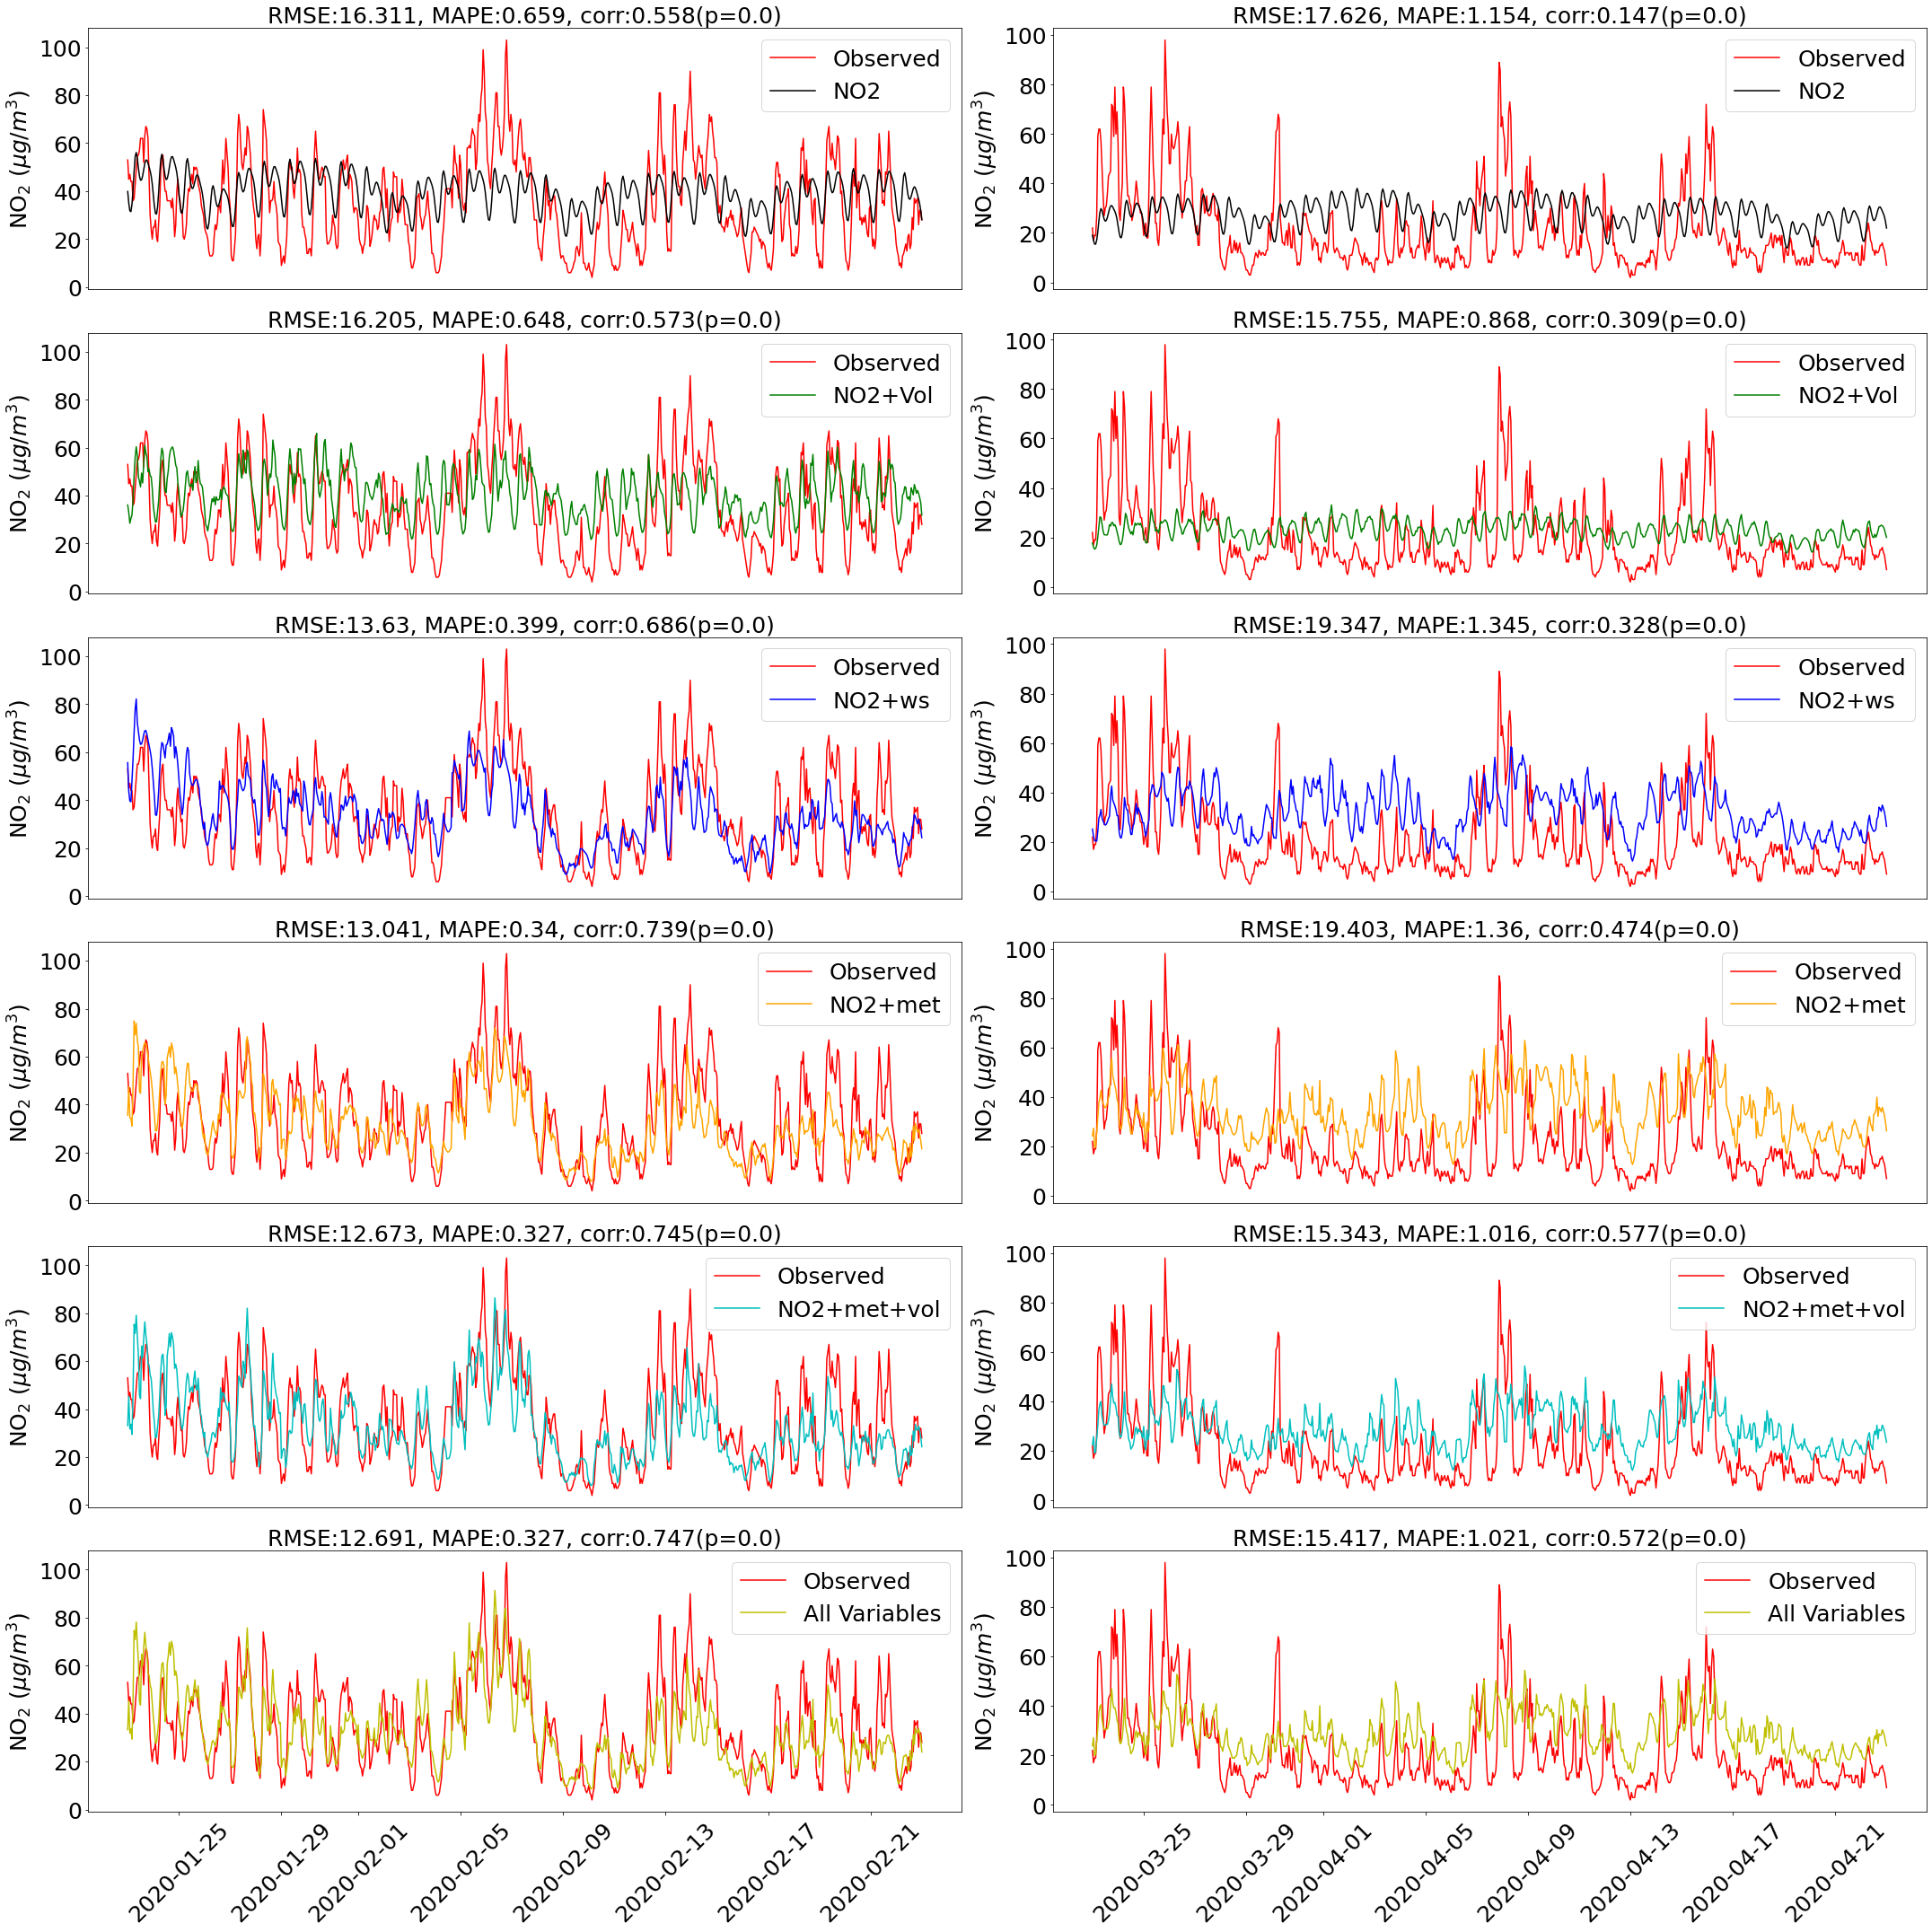

In [40]:
plt.figure(figsize=(30,30))
plt.subplot(6,2,1)
plot_FPM(no2pforecast,no2ptest,'k',"NO2")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,2)
plot_FPM(no2pforecast_ld,no2ptest_ld,'k',"NO2")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,3)
plot_FPM(no2volpforecast,no2volptest,'g',"NO2+Vol")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,4)
plot_FPM(no2volpforecast_ld,no2volptest_ld,'g',"NO2+Vol")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,5)
plot_FPM(no2wspforecast,no2wsptest,'b',"NO2+ws")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,6)
plot_FPM(no2wspforecast_ld,no2wsptest_ld,'b',"NO2+ws")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,7)
plot_FPM(metpforecast,metptest,'orange',"NO2+met")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,8)
plot_FPM(metpforecast_ld,metptest_ld,'orange',"NO2+met")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,9)
plot_FPM(metvolpforecast,metvolptest,'c',"NO2+met+vol")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,10)
plot_FPM(metvolpforecast_ld,metvolptest_ld,'c',"NO2+met+vol")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,11)
plot_FPM(allpforecast,allptest,'y',"All Variables")
plt.subplot(6,2,12)
plot_FPM(allpforecast_ld, allptest_ld,'y',"All Variables")
plt.tight_layout()
plt.savefig('./FiguresProphet/Prophet_picadilly.png')

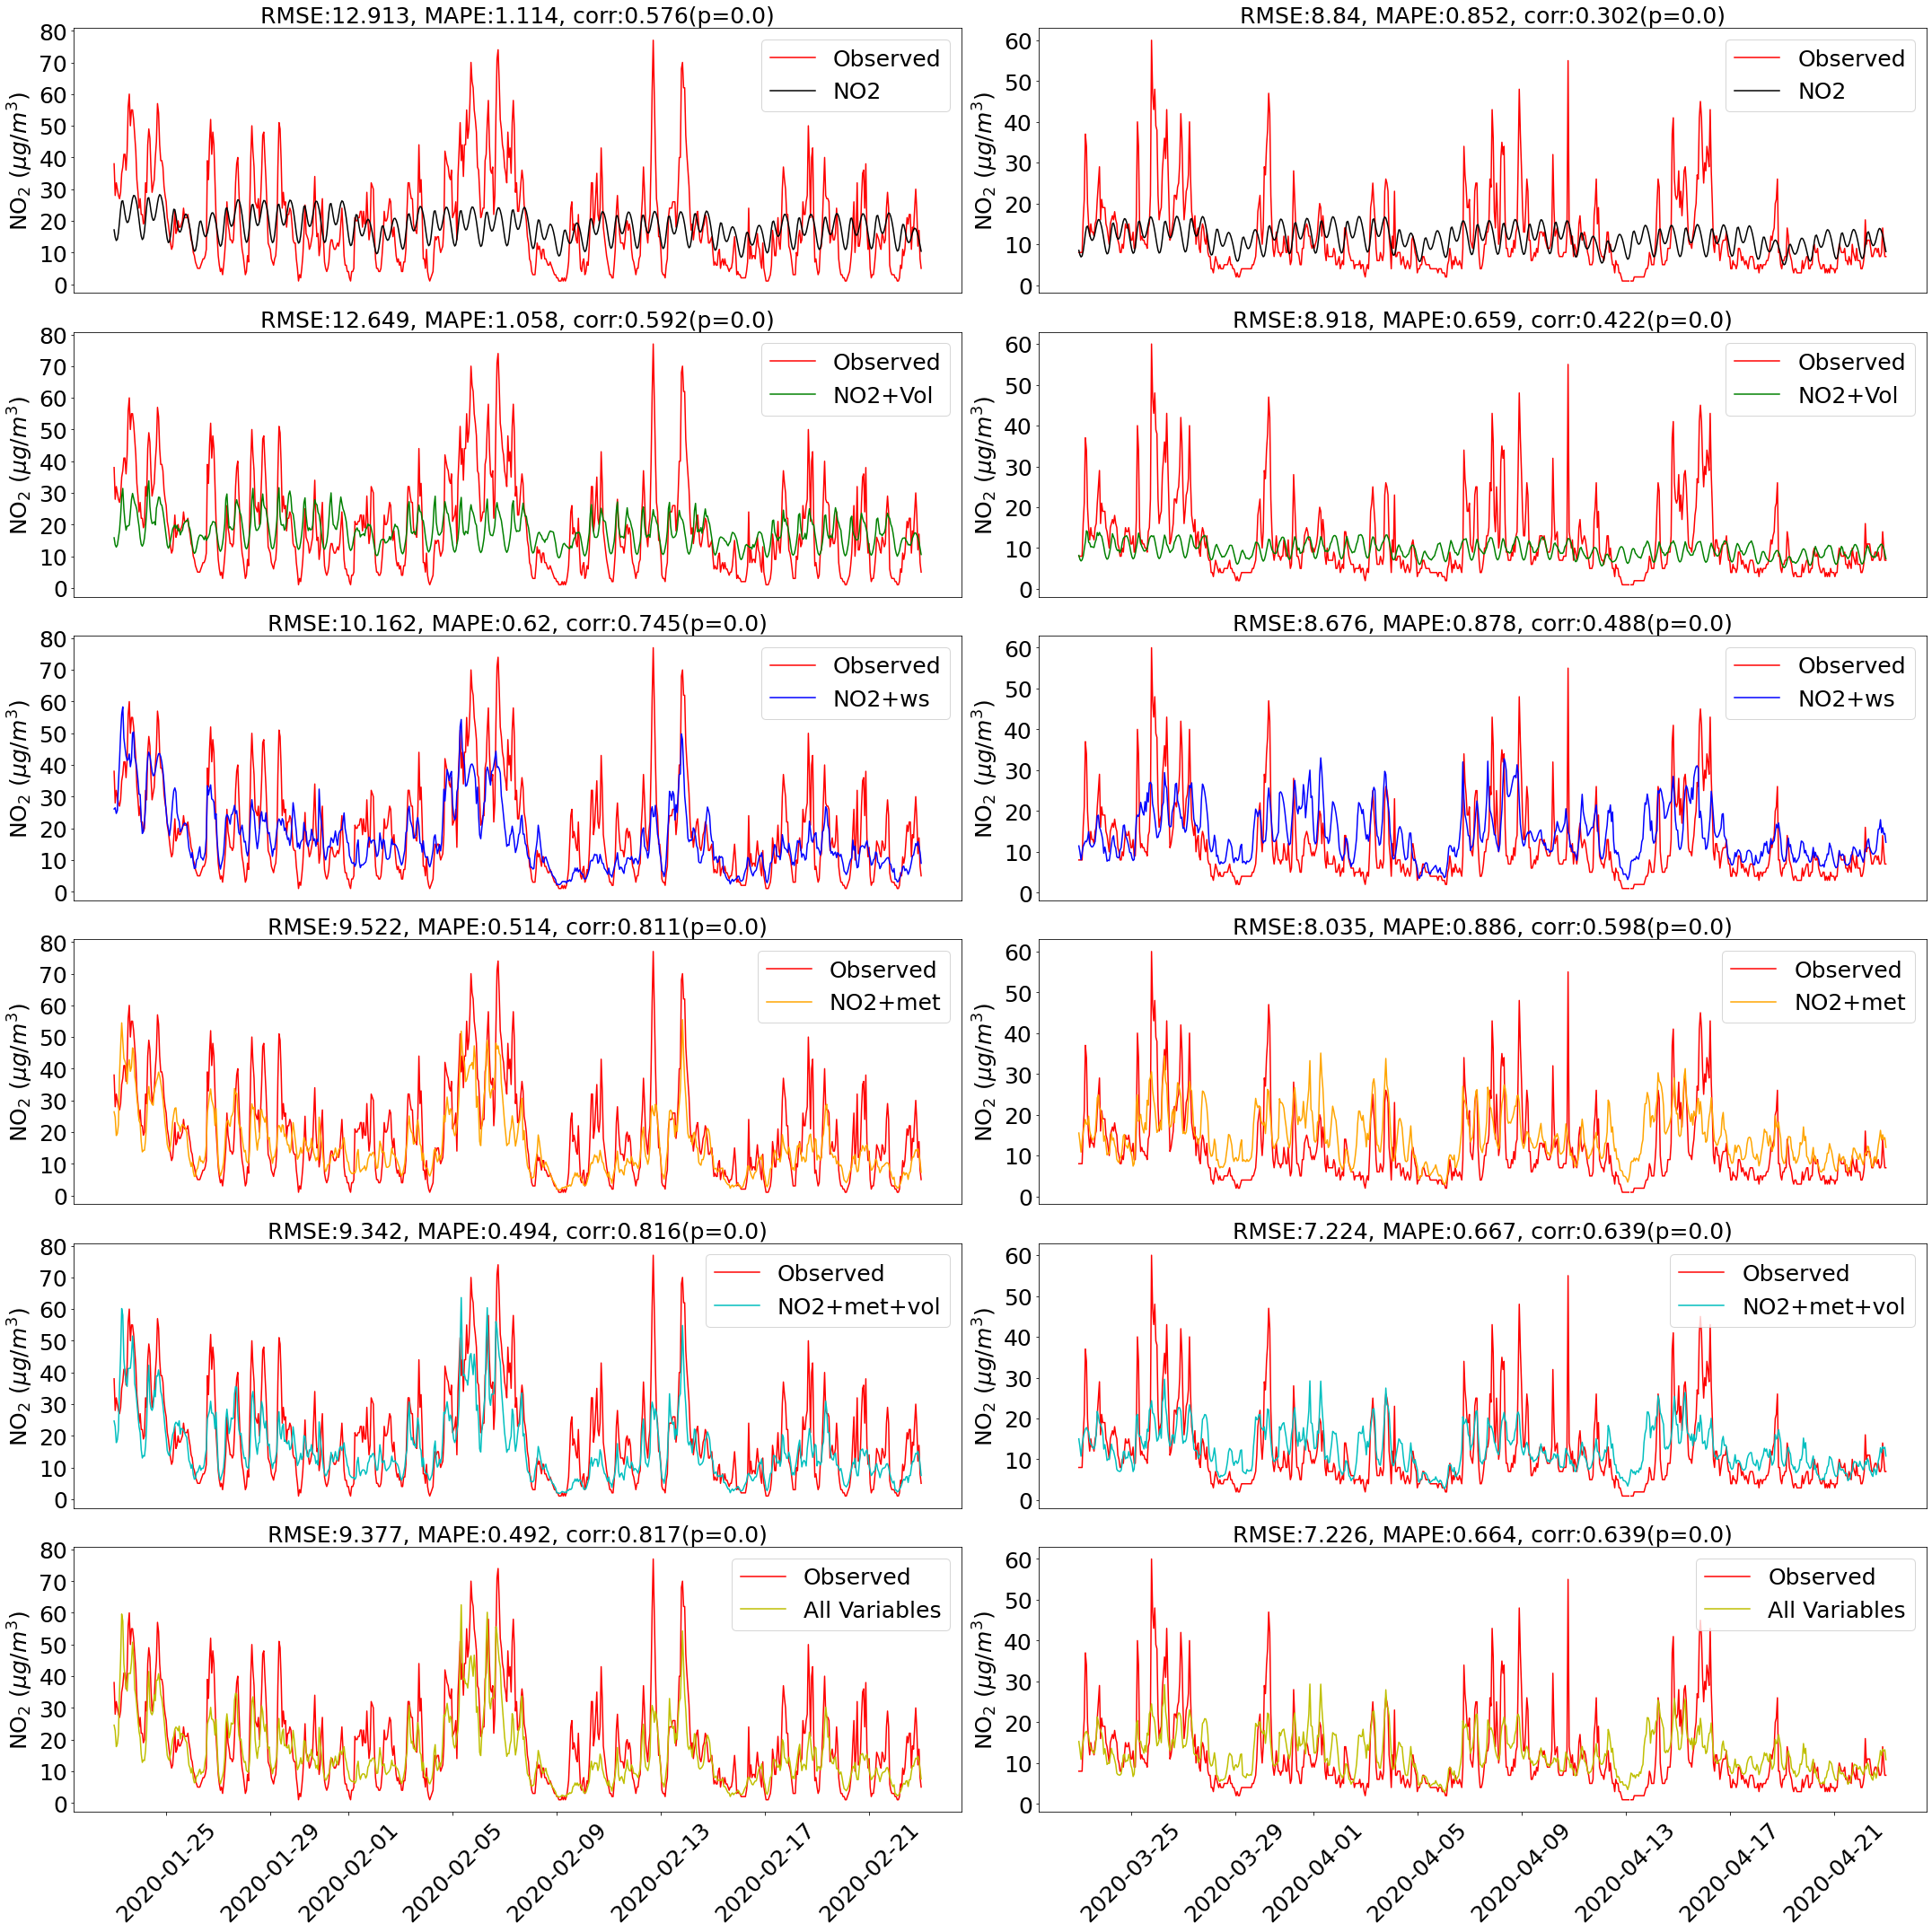

In [41]:
plt.figure(figsize=(30,30))
plt.subplot(6,2,1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2sforecast,no2stest,'k',"NO2")
plt.subplot(6,2,2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2sforecast_ld,no2stest_ld,'k',"NO2")
plt.subplot(6,2,3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2volsforecast,no2volstest,'g',"NO2+Vol")
plt.subplot(6,2,4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2volsforecast_ld,no2volstest_ld,'g',"NO2+Vol")
plt.subplot(6,2,5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2wssforecast,no2wsstest,'b',"NO2+ws")
plt.subplot(6,2,6)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(no2wssforecast_ld,no2wsstest_ld,'b',"NO2+ws")
plt.subplot(6,2,7)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(metsforecast,metstest,'orange',"NO2+met")
plt.subplot(6,2,8)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(metsforecast_ld,metstest_ld,'orange',"NO2+met")
plt.subplot(6,2,9)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plot_FPM(metvolsforecast,metvolstest,'c',"NO2+met+vol")
plt.subplot(6,2,10)
plot_FPM(metvolsforecast_ld,metvolstest_ld,'c',"NO2+met+vol")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.subplot(6,2,11)
plot_FPM(allsforecast,allstest,'y',"All Variables")
plt.subplot(6,2,12)
plot_FPM(allsforecast_ld, allstest_ld,'y',"All Variables")
plt.tight_layout()
plt.savefig('./FiguresProphet/Prophet_sharston.png')